In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from joblib import dump, load

In [2]:
housing_pre_data = pd.read_csv("data.csv")

In [3]:
imputer= SimpleImputer(strategy="median")
imputer.fit(housing_pre_data)
temp=imputer.transform(housing_pre_data)
housing_data=pd.DataFrame(temp,columns=housing_pre_data.columns)

In [4]:
housing_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283587,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702126,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

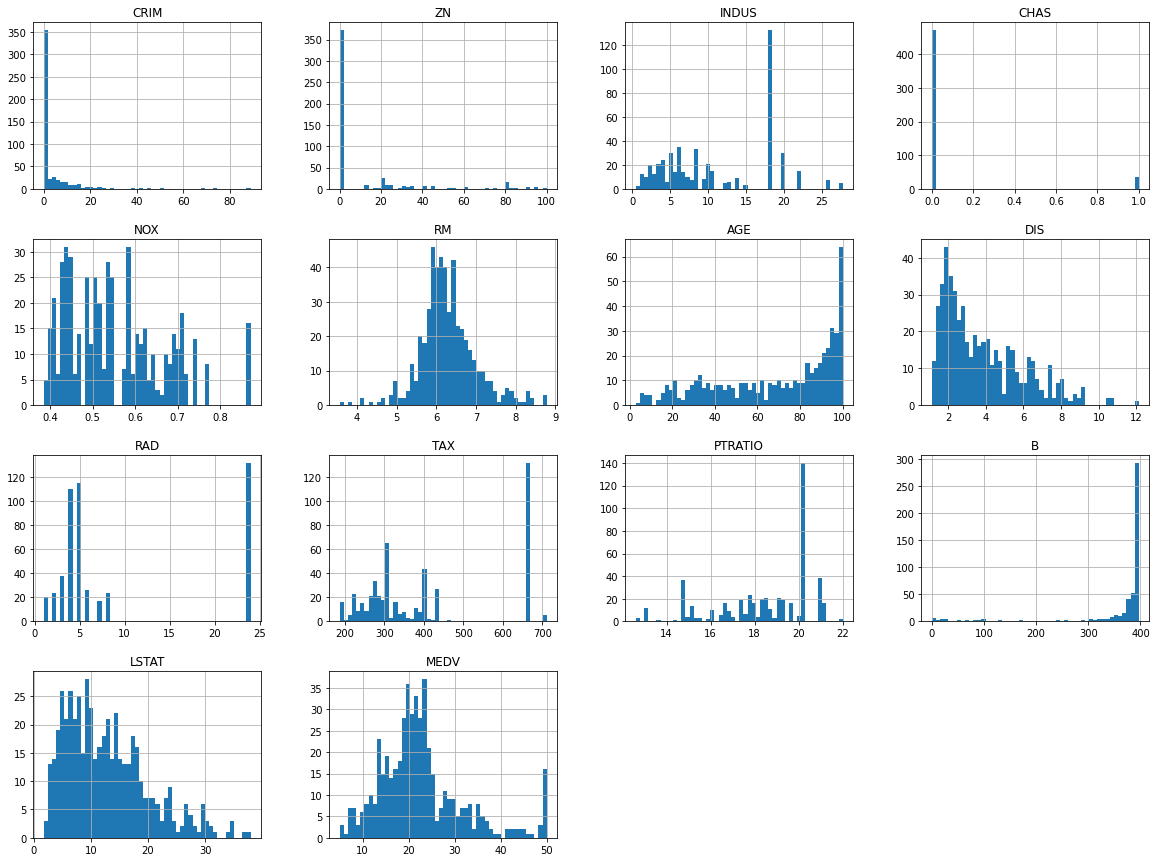

In [7]:
housing_data.hist(bins=50,figsize=(20,15))

In [8]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for training_element,testing_element in split.split(housing_data,housing_data['CHAS']):
    training_data=housing_data.loc[training_element]
    testing_data=housing_data.loc[testing_element]
print(f"Rows in train set : {len(training_data)}\nRows in test set : {len(testing_data)}\n")

Rows in train set : 404
Rows in test set : 102



In [9]:
training_data_attributes_pre=training_data.drop("MEDV",axis=1)
training_data_labels=training_data["MEDV"].copy()
training_data_attributes=StandardScaler().fit_transform(training_data_attributes_pre)

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

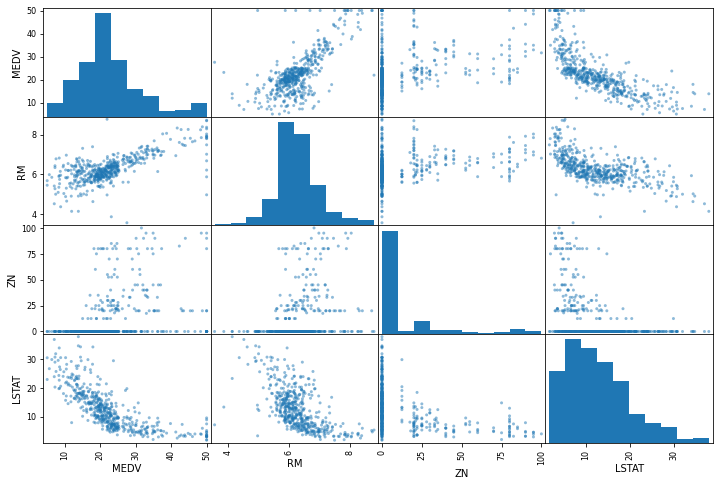

In [10]:
attributs =["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing_data[attributs],figsize=(12,8))

In [11]:
model1 = LinearRegression()
model1.fit(training_data_attributes,training_data_labels)
mse1= cross_val_score(model1, training_data_attributes, training_data_labels, scoring="neg_mean_squared_error", cv=10)
rmse1= np.sqrt(-mse1)
print("Mean: ", rmse1.mean())
print("Deviation: ", rmse1.std())

Mean:  5.037465485528445
Deviation:  1.0594525043341496


In [12]:
model2 = DecisionTreeRegressor()
model2.fit(training_data_attributes,training_data_labels)
mse2= cross_val_score(model2, training_data_attributes, training_data_labels, scoring="neg_mean_squared_error", cv=10)
rmse2= np.sqrt(-mse2)
print("Mean: ", rmse2.mean())
print("Deviation: ", rmse2.std())

Mean:  4.203066898107402
Deviation:  0.762075546018042


In [13]:
model3 = RandomForestRegressor()
model3.fit(training_data_attributes,training_data_labels)
mse3= cross_val_score(model3, training_data_attributes, training_data_labels, scoring="neg_mean_squared_error", cv=10)
rmse3= np.sqrt(-mse3)
print("Mean: ", rmse3.mean())
print("Deviation: ", rmse3.std())

Mean:  3.321868795873774
Deviation:  0.7351163315190172


In [14]:
dump(model3, 'project.joblib') 

['project.joblib']

In [15]:
testing_data_X_pre=testing_data.drop("MEDV", axis=1)
testing_data_Y=testing_data["MEDV"].copy()
testing_data_X=StandardScaler().fit_transform(testing_data_X_pre)
prediction=model3.predict(testing_data_X)
MSE=mean_squared_error(testing_data_Y,prediction)
RMSE=np.sqrt(MSE)
print(RMSE)

3.411275475910589
